## TRABAJO INTEGRADOR DE PROCESAMIENTO DE IMÁGENES DIGITALES

##1) ESPACIOS DE COLOR
a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

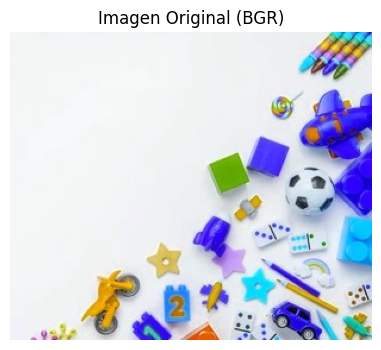

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# a) Cargar la imagen
imagen = cv2.imread("/content/drive/MyDrive/Procesamiento/toys.jpg")  # OpenCV carga la imagen en formato BGR
b, g, r = cv2.split(imagen)        # Separa los tres canales de color

# Mostrar imagen
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title("Imagen Original (BGR)")
plt.axis("off")
plt.show()

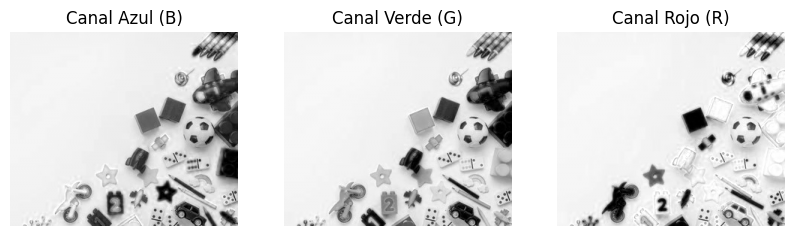

In [ ]:
# Mostrar cada canal por separado
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray')
plt.title("Canal Azul (B)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title("Canal Verde (G)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.title("Canal Rojo (R)")
plt.axis("off")
plt.show()

In [ ]:
# b) Valores promedio por canal
prom_b = np.mean(b)
prom_g = np.mean(g)
prom_r = np.mean(r)

print("Promedio canal Azul:", prom_b)
print("Promedio canal Verde:", prom_g)
print("Promedio canal Rojo:", prom_r)

Promedio canal Azul: 206.34722363340785
Promedio canal Verde: 210.9474573257468
Promedio canal Rojo: 224.56343984962405


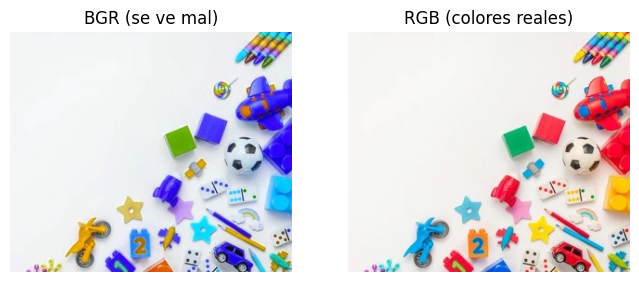

In [ ]:
# c) Convertir de BGR a RGB y mostrar
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagen)  # OpenCV (en BGR), los colores se ven raros
plt.title("BGR (se ve mal)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb)  # Convertida a RGB
plt.title("RGB (colores reales)")
plt.axis("off")
plt.show()

### Bonus: Valor promerio por canal. Gráfico de barras

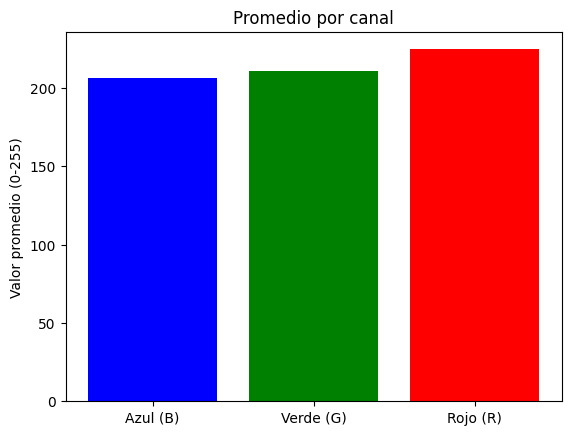

In [ ]:
plt.figure()
plt.bar(['Azul (B)', 'Verde (G)', 'Rojo (R)'], [prom_b, prom_g, prom_r], color=['blue', 'green', 'red'])
plt.title("Promedio por canal")
plt.ylabel("Valor promedio (0-255)")
plt.show()


#2) Muestreo y Cuantización


a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.

b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos

c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)

d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?


Factor 2:
- Nuevo tamaño: 152 x 129
- Reducción de datos: 75.10%

Factor 4:
- Nuevo tamaño: 76 x 64
- Reducción de datos: 93.82%

Factor 8:
- Nuevo tamaño: 38 x 32
- Reducción de datos: 98.46%


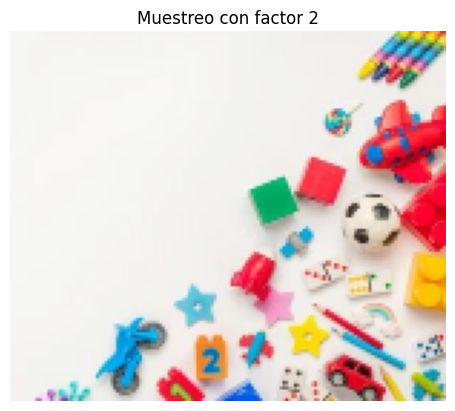

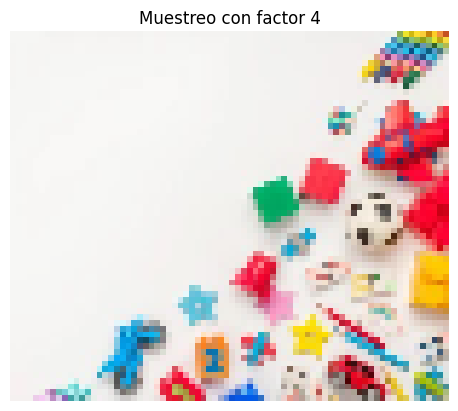

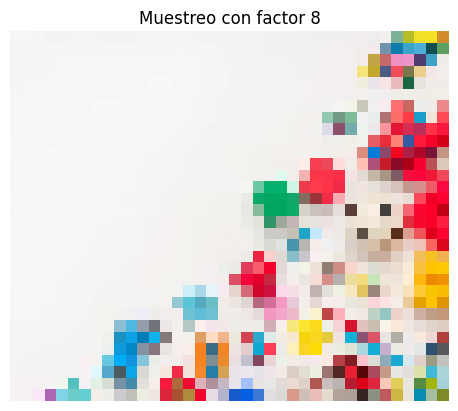

In [ ]:
# Función para mostrar imágenes con diferentes tamaños
def mostrar_muestreo(imagen_rgb, factores):
    for f in factores:
        reducida = cv2.resize(imagen_rgb, (imagen_rgb.shape[1] // f, imagen_rgb.shape[0] // f))

        plt.figure()
        plt.imshow(reducida)
        plt.title(f"Muestreo con factor {f}")
        plt.axis("off")

        # b) Cálculos
        nuevo_tamano = reducida.shape[0] * reducida.shape[1]
        original_tamano = imagen_rgb.shape[0] * imagen_rgb.shape[1]
        reduccion = 100 * (1 - nuevo_tamano / original_tamano)

        print(f"\nFactor {f}:")
        print(f"- Nuevo tamaño: {reducida.shape[1]} x {reducida.shape[0]}")
        print(f"- Reducción de datos: {reduccion:.2f}%")

# Ejecutar para factores 2, 4 y 8
mostrar_muestreo(imagen_rgb, [2, 4, 8])

### Comparación de Muestreo

El siguiente código aplica muestreo espacial con factores de 2, 4 y 8, reduciendo la resolución de la imagen original. Esto simula una disminución de datos al representar la imagen con menos píxeles. A través de una visualización comparativa, se observa cómo la imagen mantiene su forma general incluso con resoluciones más bajas, aunque va perdiendo detalles finos.

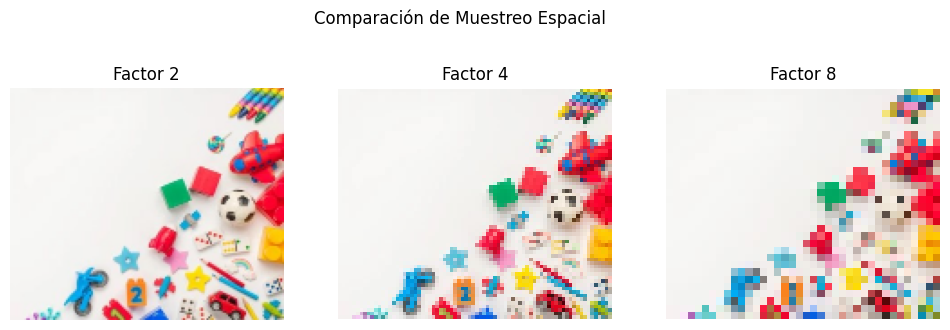

In [ ]:
factores = [2, 4, 8]
plt.figure(figsize=(12, 4)) #Se crea una figura grande para mostrar las tres versiones reducidas en una misma fila.
for i, f in enumerate(factores):       #Se recorre cada factor, f será 2,4 o 8 en cada iteración
    reducida = cv2.resize(imagen_rgb, (imagen_rgb.shape[1] // f, imagen_rgb.shape[0] // f)) #Redimensiona la imagen original (imagen_rgb) dividiendo sus dimensiones por f
    plt.subplot(1, 3, i+1)             #Se reserva un espacio en la figura (1 fila, 3 columnas) para la imagen reducida actual
    plt.imshow(reducida)               #Se muestra la imagen reducida en el espacio reservado
    plt.title(f"Factor {f}")           #Se asigna un título a la imagen
    plt.axis("off")                    #Se desactiva la visualización de ejes
plt.suptitle("Comparación de Muestreo Espacial")
plt.show()


#Cuantización
La cuantización reduce la cantidad de colores posibles en una imagen. Cuantos menos niveles, más “pixelada” o fea puede verse.

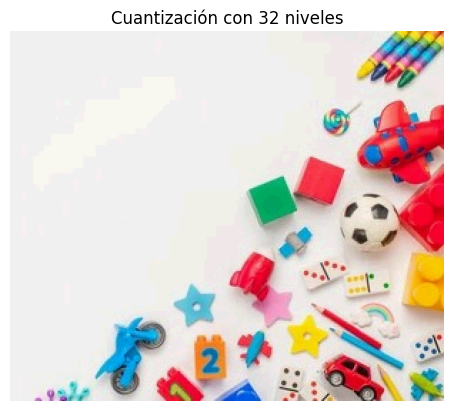

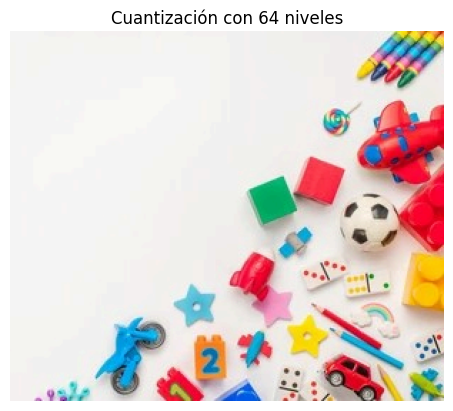

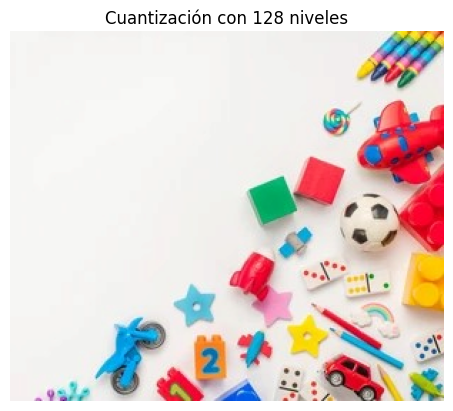

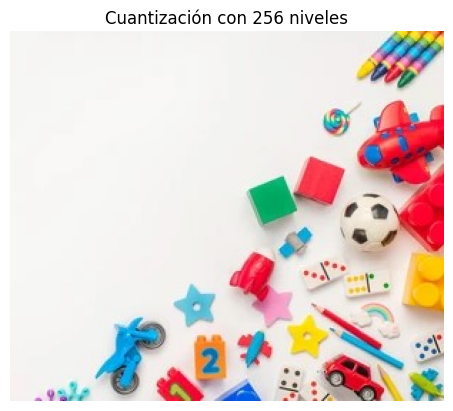

In [ ]:
# Cuantización de la imagen en distintos niveles
def cuantizar(imagen_rgb, niveles):
    for nivel in niveles:
        paso = 256 // nivel  # cuánto "salta" entre niveles
        imagen_cuant = (imagen_rgb // paso) * paso

        plt.figure()
        plt.imshow(imagen_cuant)
        plt.title(f"Cuantización con {nivel} niveles")
        plt.axis("off")

# Aplicar con niveles: 32, 64, 128, 256
cuantizar(imagen_rgb, [32, 64, 128, 256])

¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?
La degradación visual empieza a notarse cuando la cantidad de niveles de cuantización es baja, ya que se pierde información de color.

Respuesta típica basada en pruebas comunes:

A 256 niveles: no hay pérdida visible, ya que es la cuantización estándar de 8 bits por canal.

A 128 niveles: la imagen sigue siendo prácticamente indistinguible del original.

A 64 niveles: puede notarse una ligera degradación en zonas con gradientes suaves o colores similares.

A 32 niveles: la degradación ya es visiblemente notoria, con bandas de color y menos detalle.

Conclusión:

La degradación visible comienza a notarse claramente cuando se aplica cuantización con 32 niveles, ya que la pérdida de información cromática provoca artefactos notables, especialmente en zonas con gradientes de color.

##3) Segmentar un color específico (por umbrales RGB)

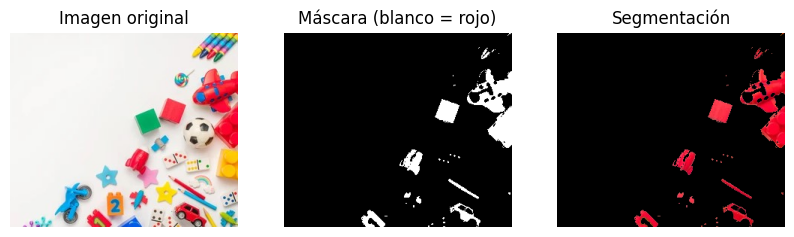

In [ ]:
# Convertimos la imagen de BGR a RGB
imagen = cv2.imread("/content/drive/MyDrive/Procesamiento/toys.jpg")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Definimos los rangos de color rojo en RGB
color_min = np.array([150, 0, 0])   # Rojo mínimo
color_max = np.array([255, 100, 100])  # Rojo máximo

# Creamos una máscara que solo tenga el color deseado
mascara = cv2.inRange(imagen_rgb, color_min, color_max)

# Aplicamos la máscara a la imagen original
resultado = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara)

# Mostramos los resultados
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.imshow(imagen_rgb)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mascara, cmap="gray")
plt.title("Máscara (blanco = rojo)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(resultado)
plt.title("Segmentación")
plt.axis("off")

plt.show()

#Histograma en escala de grises
Esto te muestra cómo están distribuidos los niveles de brillo (de 0 = negro a 255 = blanco).

In [ ]:
import cv2

imagen = cv2.imread("/content/drive/MyDrive/Procesamiento/toys.jpg")  # Carga en BGR y con tipo correcto
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)



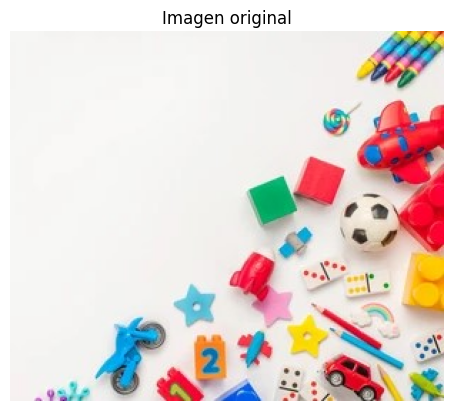

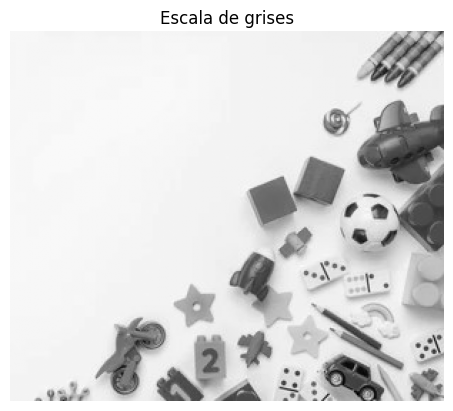

In [ ]:
# Mostrar la imagen original
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')
plt.show()

# Mostrar la imagen en escala de grises
plt.imshow(gray, cmap='gray')
plt.title('Escala de grises')
plt.axis('off')
plt.show()

<ipython-input-91-b1a9eefa574b>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])


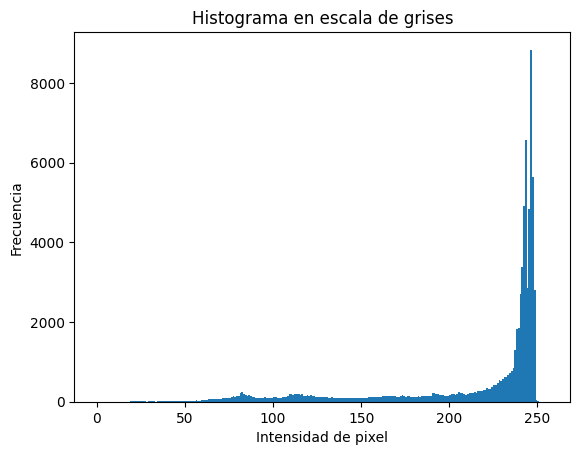

In [ ]:
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histograma en escala de grises')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')
plt.show()


¿Qué estás mostrando mi histograma?


El histograma de la imagen en escala de grises, que representa cuántos píxeles hay en cada nivel de intensidad (de 0 a 255):

Los picos cerca de 255 indican que hay muchos píxeles claros/blancos.

Las partes planas o bajas indican zonas con menos variación en la oscuridad/media.

## Continuamos con segmentación.

a) Segmentación del color rojo:
Detectamos correctamente los objetos rojos (avión, auto, bloques).

b) Histograma en escala de grises:
Mostrado en el gráfico (parte inferior izquierda). Podés observar que hay muchos tonos claros (valores altos, cerca de 255), lo cual es esperable por el fondo blanco.

c) Coordenadas del rectángulo que encierra el objeto más grande segmentado:

In [ ]:
# Cargar la imagen original
imagen_bgr = cv2.imread("/content/drive/MyDrive/Procesamiento/toys.jpg")  # Cambiá el nombre si tu imagen tiene otro nombre
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)  # Convertir a RGB para trabajar con matplotlib


 Identificar los pixeles (rojo)

 Crear máscara binaria

 Y luego, usar esa informacción

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
imagen_bgr = cv2.imread("/content/drive/MyDrive/Procesamiento/toys.jpg")
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Definir el rango del color rojo en el espacio HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

# Crear una máscara para el color rojo
red_mask = cv2.inRange(hsv, lower_red, upper_red)

# Encontrar los contornos en la máscara
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos con área intermedia (para evitar detectar el avión)
contornos_filtrados = [c for c in contours if 200 < cv2.contourArea(c) < 1000]

if contornos_filtrados:
    # Elegir el contorno más grande dentro de los filtrados
    contorno_deseado = max(contornos_filtrados, key=cv2.contourArea)

    # Calcular el rectángulo que encierra el contorno
    x, y, ancho, alto = cv2.boundingRect(contorno_deseado)
    print(f"Coordenadas del rectángulo: x={x}, y={y}, ancho={ancho}, alto={alto}")

    # Copiar imagen para dibujar encima
    imagen_con_bordes = imagen_rgb.copy()

    # Dibujar contorno y rectángulo en rojo
    cv2.drawContours(imagen_con_bordes, [contorno_deseado], -1, (255, 0, 0), 2)
    cv2.rectangle(imagen_con_bordes, (x, y), (x + ancho, y + alto), (255, 0, 0), 2)

    # Mostrar resultado
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen_con_bordes)
    plt.title("Cubo rojo segmentado con bordes")
    plt.axis("off")
    plt.show()
else:
    print("No se encontraron contornos dentro del área esperada.")

No se encontraron contornos dentro del área esperada.


In [ ]:
# Mostrar todas las áreas de los contornos encontrados
print(f"Se encontraron {len(contours)} contornos")
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    print(f"Contorno {i}: Área = {area}")


Se encontraron 72 contornos
Contorno 0: Área = 0.0
Contorno 1: Área = 1.0
Contorno 2: Área = 2.0
Contorno 3: Área = 5.0
Contorno 4: Área = 0.0
Contorno 5: Área = 4.0
Contorno 6: Área = 0.0
Contorno 7: Área = 0.0
Contorno 8: Área = 0.0
Contorno 9: Área = 0.0
Contorno 10: Área = 2.0
Contorno 11: Área = 8.0
Contorno 12: Área = 0.0
Contorno 13: Área = 2.0
Contorno 14: Área = 0.0
Contorno 15: Área = 0.0
Contorno 16: Área = 0.0
Contorno 17: Área = 0.0
Contorno 18: Área = 21.5
Contorno 19: Área = 0.0
Contorno 20: Área = 0.0
Contorno 21: Área = 1.5
Contorno 22: Área = 3.0
Contorno 23: Área = 0.0
Contorno 24: Área = 0.0
Contorno 25: Área = 1.0
Contorno 26: Área = 0.5
Contorno 27: Área = 0.0
Contorno 28: Área = 0.0
Contorno 29: Área = 1.0
Contorno 30: Área = 4.5
Contorno 31: Área = 2.5
Contorno 32: Área = 1.5
Contorno 33: Área = 0.0
Contorno 34: Área = 0.0
Contorno 35: Área = 120.0
Contorno 36: Área = 0.0
Contorno 37: Área = 0.0
Contorno 38: Área = 0.0
Contorno 39: Área = 0.0
Contorno 40: Área =

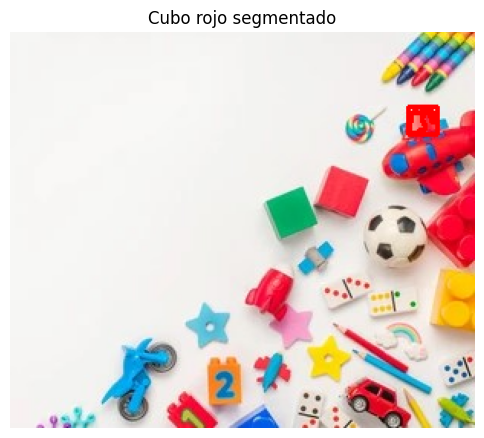

In [ ]:
# Filtrar los contornos que tengan un área razonable (por ejemplo, menor a 1000 píxeles)
contornos_filtrados = [c for c in contours if 136 < cv2.contourArea(c) < 1000]

if contornos_filtrados:
    # Elegir el contorno más grande dentro de los filtrados
    contorno_deseado = max(contornos_filtrados, key=cv2.contourArea)

    x, y, ancho, alto = cv2.boundingRect(contorno_deseado)

    imagen_con_bordes = imagen_rgb.copy()
    cv2.drawContours(imagen_con_bordes, [contorno_deseado], -1, (255, 0, 0), 2)
    cv2.rectangle(imagen_con_bordes, (x, y), (x + ancho, y + alto), (255, 0, 0), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(imagen_con_bordes)
    plt.title("Cubo rojo segmentado")
    plt.axis("off")
    plt.show()

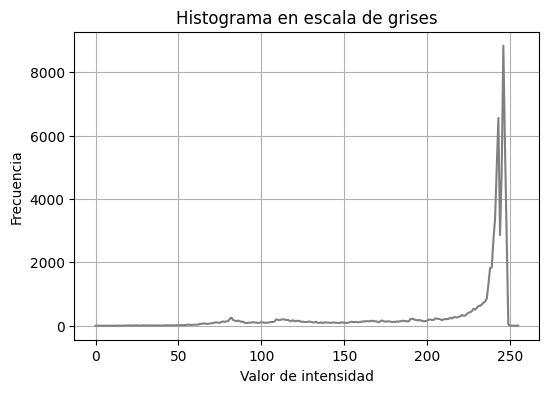

In [ ]:
# b) Calcular y mostrar el histograma de la imagen en escala de grises

# Convertir la imagen original a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

# Calcular el histograma de la imagen en escala de grises
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.figure(figsize=(6, 4))
plt.plot(histograma, color='gray')
plt.title("Histograma en escala de grises")
plt.xlabel("Valor de intensidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

## Comparación de mask y segmentada

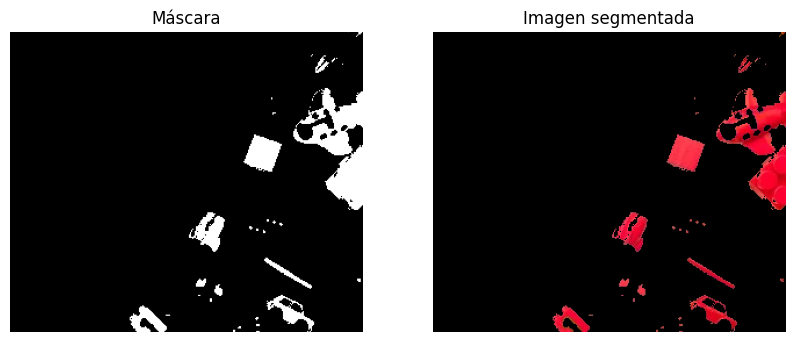

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mascara, cmap="gray")
plt.title("Máscara")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resultado)
plt.title("Imagen segmentada")
plt.axis("off")

plt.show()
